The goal of this code is to train a LSTM model to be able to distinguish news from fake news.





# Importing important libraries

In [ ]:
# Math and Data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# import some important model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# LSTM ML Model Libraries
import keras
from keras import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Text Processing Libraries
import nltk
from nltk.corpus import stopwords as sw
from nltk.stem import PorterStemmer

import re
from string import punctuation

In [ ]:
# Wordcloud Plot Libraries
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

# Reading dataset

In [ ]:
# Reading data and split it into training and testing
Training_all = pd.read_csv("train.csv")
Training = Training_all[0:(4160*4)]
Testing = Training_all.drop(Training_all.index[0:(4160*4)])

# Simple data analysis

In [ ]:
# The first five line of the dataset:
Training.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# printing shape of our dataset
Training.shape

(16640, 5)

In [ ]:
Testing.shape

(4160, 5)

In [ ]:
# counting the null value of the training data
Training.isnull().sum()

id           0
title      432
author    1591
text        34
label        0
dtype: int64

In [ ]:
# counting the null value of the testing data
Testing.isnull().sum()

id          0
title     126
author    366
text        5
label       0
dtype: int64

# WordCloud

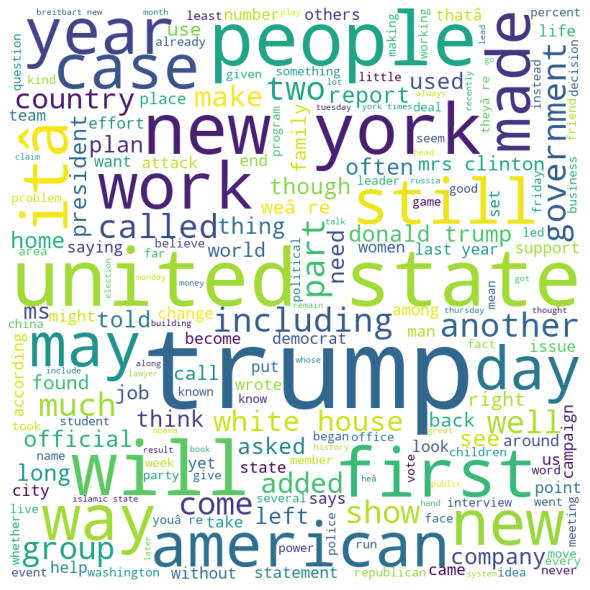

In [ ]:
# Python program to generate WordCloud for False news
# code from https://www.geeksforgeeks.org/generating-word-cloud-python/
# modified by Yuqi Chen(yuqichen@seas.upenn.edu)

# # Reads 'test.csv' file  
# df_test = pd.read_csv("test.csv", encoding ="latin-1") 

# Reads 'train.csv' file  
df = pd.read_csv("train.csv", encoding ="latin-1") 
df = df[df["label"] == 0]

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

# stopwords update
stopwords.update(["said", "one", "even", "mr", "now", "time", "say", "many"])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

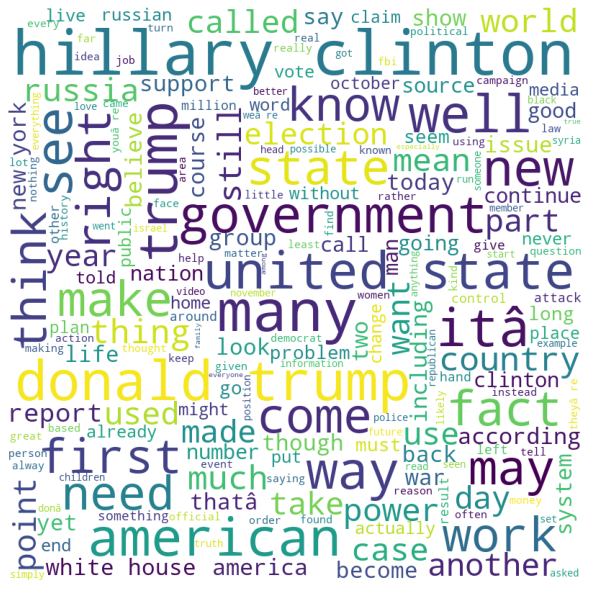

In [ ]:
# Python program to generate WordCloud for True news
# code from https://www.geeksforgeeks.org/generating-word-cloud-python/
# modified by Yuqi Chen(yuqichen@seas.upenn.edu)
 
# Reads 'train.csv' file  
df = pd.read_csv("train.csv", encoding ="latin-1")
df = df[df["label"] == 1] 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

# stopwords update
stopwords.update(["said", "one", "even", "weill", "now", "time", "say", "people", "will", "us"])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Pre-processing data

In [ ]:
# here we are droping NaN values from our training dataset
Training1 = Training.dropna()
print(Training1.shape)
# print(Training1.isnull().sum())

# here we are droping NaN values from our testing dataset
Testing.fillna('fake fake fake',inplace=True)
print(Testing.shape)

(14617, 5)
(4160, 5)


In [ ]:
#split the training dataset into x_train and y_train
x_train1 = Training1.drop('label',axis = 1)
y_train1 = Training1['label']
x_train1.head(5)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
nltk.download("stopwords")
# stopwords.update(["said", "one", "even", "mr", "now", "time", "say", "many"])
# stopwords.update(["said", "one", "even", "weill", "now", "time", "say", "people", "will", "us"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function used to stem words
stop_words = sw.words('english')
ps = PorterStemmer()

def preprocess(text):

    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    text = ''.join(p for p in text if p not in punctuation)
    
    return text

In [ ]:
df = Training1

# consider only title 
df['solo-title'] = df['title'].apply(preprocess)

# consider only author
df['solo-author'] = df['author'].apply(preprocess)

# consider only text
df['solo-text'] = df['text'].apply(preprocess)

# combine all the data of tile and text
df['useless'] = df['title'] + " " + df['text']
df['wholetext'] = df['useless'].apply(preprocess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
df_testing = Testing

# consider only title 
df_testing['solo-title'] = df_testing['title'].apply(preprocess)

# consider only author
df_testing['solo-author'] = df_testing['author'].apply(preprocess)

# consider only text
df_testing['solo-text'] = df_testing['text'].apply(preprocess)

# combine all the data of tile and text
df_testing['useless'] = df_testing['title'] + " " + df_testing['text']
df_testing['wholetext'] = df_testing['useless'].apply(preprocess)

In [ ]:
df.head()

,id,title,author,text,label,solo-title,solo-author,solo-text,useless,wholetext
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...,darrel lucu,hous dem aid even see comey letter jason chaff...,House Dem Aide: We Didn’t Even See Comey’s Let...,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbart,daniel j flynn,ever get feel life circl roundabout rather hea...,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillari clinton big woman campu breitbar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire,consortiumnew com,truth might get fire octob tension intellig an...,Why the Truth Might Get You Fired Why the Trut...,truth might get fire truth might get fire octo...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi,jessica purkiss,video civilian kill singl us airstrik identifi...,15 Civilians Killed In Single US Airstrike Hav...,civilian kill singl us airstrik identifi video...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...,howard portnoy,print iranian woman sentenc six year prison ir...,Iranian woman jailed for fictional unpublished...,iranian woman jail fiction unpublish stori wom...


In [ ]:
df_testing.head()

,id,title,author,text,label,solo-title,solo-author,solo-text,useless,wholetext
16640,16640,Melania Trump Plagiarized Her Speech AGAIN – A...,Jameson Parker,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,melania trump plagiar speech time ridicul sour...,jameson parker,googl pinterest digg linkedin reddit stumbleup...,Melania Trump Plagiarized Her Speech AGAIN – A...,melania trump plagiar speech time ridicul sour...
16641,16641,Virgil: Arguments from Bad Authority: How the ...,Virgil,"In rhetoric, there’s an ancient concept called...",0,virgil argument bad author mainstream media tr...,virgil,rhetor ancient concept call argument author la...,Virgil: Arguments from Bad Authority: How the ...,virgil argument bad author mainstream media tr...
16642,16642,NATIONAL GEOGRAPHIC – The ARMAGEDDON (Document...,Pakalert,Support Us NATIONAL GEOGRAPHIC – The ARMAGEDDO...,1,nation geograph armageddon documentari film,pakalert,support us nation geograph armageddon document...,NATIONAL GEOGRAPHIC – The ARMAGEDDON (Document...,nation geograph armageddon documentari film su...
16643,16643,‘Doomocracy’ Puts the Politics of Fear on Disp...,Randy Kennedy,The artist Pedro Reyes is a biting social crit...,0,doomocraci put polit fear display brooklyn new...,randi kennedi,artist pedro rey bite social critic whose piec...,‘Doomocracy’ Puts the Politics of Fear on Disp...,doomocraci put polit fear display brooklyn new...
16644,16644,"Success of Jerry Brown, and California, Offers...",Adam Nagourney,SACRAMENTO — When Bernie Sanders held a ral...,0,success jerri brown california offer lesson na...,adam nagourney,sacramento berni sander held ralli outdoor sta...,"Success of Jerry Brown, and California, Offers...",success jerri brown california offer lesson na...


# Vectorizing the data

In [ ]:
# Different features input used to train the model
X_train1 = df['solo-title']
X_train2 = df['solo-author']
X_train3 = df['solo-text']
X_train4 = df['wholetext']
y_train = np.asarray(df['label'])

# Different features used to test the accuracy of the model
X_test1 = df_testing['solo-title']
X_test2 = df_testing['solo-author']
X_test3 = df_testing['solo-text']
X_test4 = df_testing['wholetext']
y_test = np.asarray(df_testing['label'])
print(X_train1.shape)
print(y_train.shape)
print(X_test1.shape)
print(y_test.shape)

(14617,)
(14617,)
(4160,)
(4160,)


In [ ]:
# Function defined to vectorize texts
vocab_size = 20000
embedding_dim = 120

def vectandpad(train,test):
  tokenizer = Tokenizer(num_words = vocab_size)
  tokenizer.fit_on_texts(train)
  
  train_sequences = tokenizer.texts_to_sequences(train)
  padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')

  test_sequences = tokenizer.texts_to_sequences(test)
  padded_test = pad_sequences(test_sequences,maxlen = 40, padding = 'post', truncating = 'post')

  return padded_train, padded_test

In [ ]:
# Transform texts form list to numberic array
train_vec1, test_vec1 = vectandpad(X_train1, X_test1)
train_vec2, test_vec2 = vectandpad(X_train2, X_test2)
train_vec3, test_vec3 = vectandpad(X_train3, X_test3)
train_vec4, test_vec4 = vectandpad(X_train4, X_test4)

# Method 1: Logistic Regression

In [ ]:
# solo-title
clf1 = LogisticRegression(random_state=0, max_iter=1000).fit(train_vec1, y_train)
acc_log1 = clf1.score(test_vec1,y_test)

# solo-author
clf2 = LogisticRegression(random_state=0, max_iter=1000).fit(train_vec2, y_train)
acc_log2 = clf2.score(test_vec2,y_test)

# solo-text
clf3 = LogisticRegression(random_state=0, max_iter=1000).fit(train_vec3, y_train)
acc_log3 = clf3.score(test_vec3,y_test)

# wholetext
clf4 = LogisticRegression(random_state=0, max_iter=1000).fit(train_vec4, y_train)
acc_log4 = clf4.score(test_vec4,y_test)

accuracy_log = [acc_log1,acc_log2,acc_log3,acc_log4]

# Method 2: Decision trees

In [ ]:
# solo-title
random1= RandomForestClassifier(n_estimators=5)
random1.fit(train_vec1, y_train)
acc_Rando1 = random1.score(test_vec1,y_test)

# solo-author
random2= RandomForestClassifier(n_estimators=5)
random2.fit(train_vec2, y_train)
acc_Rando2 = random2.score(test_vec2,y_test)

# solo-text
random3= RandomForestClassifier(n_estimators=5)
random3.fit(train_vec3, y_train)
acc_Rando3 = random1.score(test_vec3,y_test)

# wholetext
random4= RandomForestClassifier(n_estimators=5)
random4.fit(train_vec4, y_train)
acc_Rando4 = random4.score(test_vec4,y_test)

accuracy_Rand = [acc_Rando1,acc_Rando2,acc_Rando3,acc_Rando4]

In [ ]:
# solo-title
Ada1= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Ada1.fit(train_vec1, y_train)
acc_Ada1 = Ada1.score(test_vec1,y_test)

# solo-author
Ada2= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Ada2.fit(train_vec2, y_train)
acc_Ada2= Ada1.score(test_vec2,y_test)

# solo-text
Ada3= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Ada3.fit(train_vec3, y_train)
acc_Ada3 = Ada1.score(test_vec3,y_test)

# wholetext
Ada4= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Ada4.fit(train_vec4, y_train)
acc_Ada4 = Ada4.score(test_vec4,y_test)

accuracy_Ada = [acc_Ada1,acc_Ada2,acc_Ada3,acc_Ada4]

# Method 3: General RNN

In [ ]:
# Build a general RNN Model  
embedding_dim = 120
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, embedding_dim))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()
model_rnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the general RNN Model
# solo-title
TrainingRecord_rnn1 = model_rnn.fit(train_vec1, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss1, accuracy1 = model_rnn.evaluate(test_vec1, y_test,verbose=True)

# solo-author
TrainingRecord_rnn2 = model_rnn.fit(train_vec2, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss2, accuracy2 = model_rnn.evaluate(test_vec2, y_test,verbose=True)

# solo-text
TrainingRecord_rnn3 = model_rnn.fit(train_vec3, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss3, accuracy3 = model_rnn.evaluate(test_vec3, y_test,verbose=True)

# wholetext
TrainingRecord_rnn4 = model_rnn.fit(train_vec4, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss4, accuracy4 = model_rnn.evaluate(test_vec4, y_test,verbose=True)

accuracy_RNN = [accuracy1,accuracy2,accuracy3,accuracy4]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         2400000   
_________________________________________________________________
dropout (Dropout)            (None, None, 120)         0         
_________________________________________________________________
dense (Dense)                (None, None, 128)         15488     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           129       
Total params: 2,415,617
Trainable params: 2,415,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
206/206 [==============================] - 8s 40ms/step - loss: 0.6666 - accuracy: 0.5764 - val_loss: 

# Method 4: LSTM

In [ ]:
# Build the LSTM RNN Model  
embedding_dim = 120
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim))
model_lstm.add(Bidirectional(LSTM(128)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()
model_lstm.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Train the LSTM RNN Model
# solo-title
TrainingRecord_lstm1 = model_lstm.fit(train_vec1, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss1, accuracy1 = model_lstm.evaluate(test_vec1, y_test,verbose=True)

# solo-author
TrainingRecord_lstm2 = model_lstm.fit(train_vec2, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss2, accuracy2 = model_lstm.evaluate(test_vec2, y_test,verbose=True)

# solo-text
TrainingRecord_lstm3 = model_lstm.fit(train_vec3, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss3, accuracy3 = model_lstm.evaluate(test_vec3, y_test,verbose=True)

# wholetext
TrainingRecord_lstm4 = model_lstm.fit(train_vec4, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss4, accuracy4 = model_lstm.evaluate(test_vec4, y_test,verbose=True)

accuracy_LSTM = [accuracy1,accuracy2,accuracy3,accuracy4]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 120)         2400000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               254976    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,688,001
Trainable params: 2,688,001
Non-trainable params: 0
____________________________________________

# LSTM Layer Tests

In [ ]:
# Build the LSTM RNN Model  
embedding_dim = 40
vocab_size = 20000
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim))
model_lstm.add(Bidirectional(LSTM(100)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(100, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()
model_lstm.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TrainingRecord_lstm4 = model_lstm.fit(train_vec4, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss4, accuracy4 = model_lstm.evaluate(test_vec4, y_test,verbose=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 40)          800000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 933,001
Trainable params: 933,001
Non-trainable params: 0
________________________________________________

In [ ]:
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(20000, EMBEDDING_DIM))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TrainingRecord_lstm4 = model.fit(train_vec4, y_train, batch_size = 128, validation_split = 0.1, epochs = 5)
loss4, accuracy4 = model.evaluate(test_vec4, y_test,verbose=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 2,092,801
Trainable params: 2,092,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
103/103 [==============================] - 15s 146ms/step - loss: 0.2700 - accuracy: 0.8746 - val_lo

In [ ]:
print(vocab_size)
# Build the LSTM RNN Model  
embedding_dim = 120
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim))
model_lstm.add(Bidirectional(LSTM(120)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(120, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()
model_lstm.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TrainingRecord_lstm4 = model_lstm.fit(train_vec4, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
loss4, accuracy4 = model_lstm.evaluate(test_vec4, y_test,verbose=True)

20000
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 120)         2400000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 240)               231360    
_________________________________________________________________
dropout_7 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               28920     
_________________________________________________________________
dropout_8 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 121       
Total params: 2,660,401
Trainable params: 2,660,401
Non-trainable params: 0
______________________________________

# Comparing the accuracy

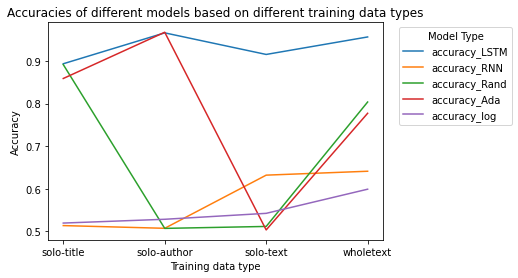

In [ ]:
# plot a line chart for different models' accuracy
x_type = ['solo-title','solo-author','solo-text','wholetext']
plt.plot(x_type,accuracy_LSTM,x_type,accuracy_RNN,x_type,accuracy_Ada,x_type,accuracy_Rand,x_type,accuracy_log)
plt.legend(['accuracy_LSTM','accuracy_RNN','accuracy_Rand','accuracy_Ada','accuracy_log'], title='Model Type', loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Accuracies of different models based on different training data types')
plt.xlabel('Training data type')
plt.ylabel('Accuracy')
plt.show()

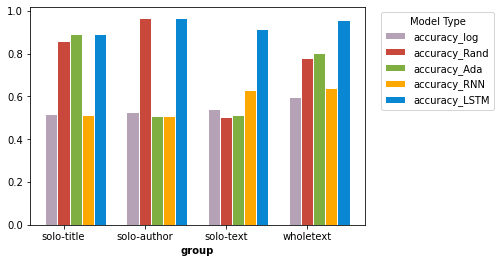

In [ ]:
# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = accuracy_log
bars2 = accuracy_Rand
bars3 = accuracy_Ada
bars4 = accuracy_RNN
bars5 = accuracy_LSTM

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

 
# Make the plot
plt.bar(r1, bars1, color='#B6A2B6', width=barWidth, edgecolor='white', label='accuracy_log')
plt.bar(r2, bars2, color='#C8493B', width=barWidth, edgecolor='white', label='accuracy_Rand')
plt.bar(r3, bars3, color='#7FAF41', width=barWidth, edgecolor='white', label='accuracy_Ada')
plt.bar(r4, bars4, color='#FDA800', width=barWidth, edgecolor='white', label='accuracy_RNN')
plt.bar(r5, bars5, color='#0987D2', width=barWidth, edgecolor='white', label='accuracy_LSTM')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['solo-title', 'solo-author', 'solo-text', 'wholetext'])
 
# Create legend & Show graphic
plt.legend(title='Model Type', loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

In [ ]:
# Breif table of all the results (accuracy of all the models based on different training data types)
accuracy_all = [accuracy_log,accuracy_Rand,accuracy_Ada,accuracy_RNN,accuracy_LSTM]
df_accuracy_all = pd.DataFrame (accuracy_all,columns=['solo-title','solo-author','solo-text','wholetext'])
df_accuracy_all['Model Type'] = ['Logistic Regression','Random Forest','Adaboost','RNN','LSTM'] 
df_accuracy_all.head()

,solo-title,solo-author,solo-text,wholetext,Model Type
0,0.519231,0.528125,0.542067,0.598798,Logistic Regression
1,0.858894,0.967548,0.503125,0.777163,Random Forest
2,0.891587,0.506731,0.511298,0.803606,Adaboost
3,0.513293,0.506917,0.631803,0.640974,RNN
4,0.893510,0.966106,0.915385,0.956490,LSTM
